# *Data Science and Buisness Analytics Internship*

# *TSF GRIP DEC22*

# Task 1- Prediction Using Decision Tree Algorithm

- In this task,we are going to create the deciision tree classifier and visualize it graphically.
- The purpose of this task is if we feed any new data to this classifier,it would be able to predict the right               class accordingly.
- The data used for this task is a classic iris dataset. The Iris flower data set or Fisher's Iris data set is a multivariate data set. The data set consists of 150 samples from each of three species of Iris (Iris setosa-0, Iris virginica-1 and Iris versicolor-2). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.
- This is a classic classifiction problem we are going to solve with the use of decision tree classifier.

## Decision Tree Classifier-
                  Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions,                        similarly to how humans make decisions.

## Objective: Classify new flower as belonging to one of the 3 classes present in data set.

### Importing reqired libraries and the dataset

In [2]:
# Importing libraries in Python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the dataset

In [3]:
# Loading the dataset 
data = pd.read_csv("Iris.csv")
print("Data imported successfully!!!!!")
data.head(5)

Data imported successfully!!!!!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Forming the iris dataframe
f_data = pd.DataFrame(data=data,columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
print(f_data.head(10))

# creating target variable
y=data.Species
print(y)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
5            5.4           3.9            1.7           0.4
6            4.6           3.4            1.4           0.3
7            5.0           3.4            1.5           0.2
8            4.4           2.9            1.4           0.2
9            4.9           3.1            1.5           0.1
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


### EDA -
           - Outliers or abnormal occurrences in a dataset can have an impact on the accuracy of machine learning models. 
           - The dataset might also contain some missing or duplicate values. EDA may be used to eliminate or resolve all of the dataset’s undesirable qualities.

In [13]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data = data.drop(columns='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
#how many data points for each class are present?
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Knowing missing values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 - The variables have no missing values.

#### *Visualising the sepal and petal dimensions*

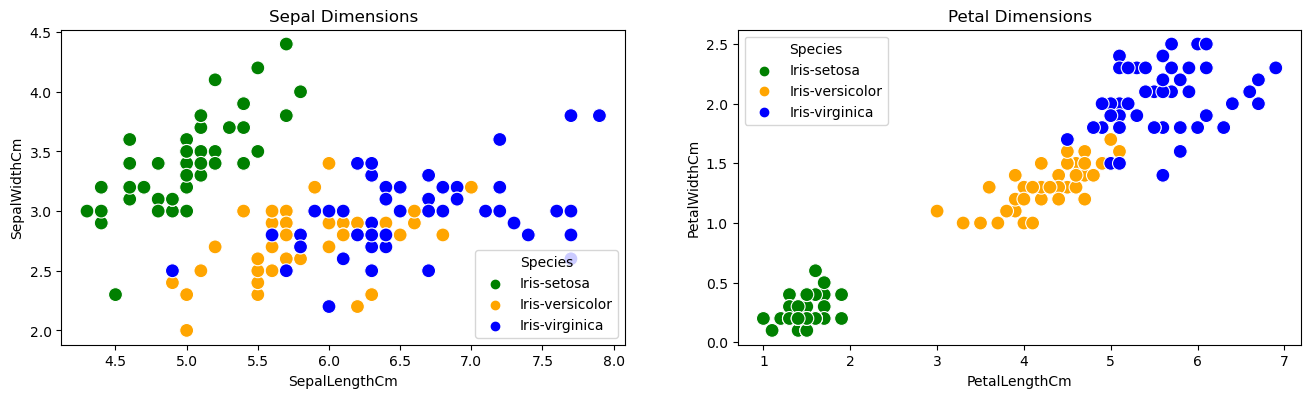

In [18]:
plt.figure(figsize=(16,9))


plt.subplot(2,2,1)
plt.title('Sepal Dimensions')
sns.scatterplot(x=data["SepalLengthCm"], 
                y=data["SepalWidthCm"], 
                hue=data["Species"],palette = ["green","orange","blue"],
                s=100);

plt.subplot(2,2,2)
plt.title('Petal Dimensions')
sns.scatterplot(x=data["PetalLengthCm"], 
                y=data["PetalWidthCm"], 
                hue=data["Species"],palette = ["green","orange","blue"],
                s=100);

####  - Sepal Dimensions:                                           
           The "Iris-setosa" has - Small sepal length                     
                                 - Large sepal width
                                 - Small petal length
                                 - Small petal width
 In some cases it is very difficult is classify species "Iris-versicolor" and species "Iris-virginica".
 They almost have same sepal dimentions. 
 Here it is easy to seperate species "Iris-setosa" from the other two species with linear boundary, but it is not possible to seperate species "Iris-versicolor" and "Iris-virginica" with linear boundary and hence requires complex boundary for seperation.
 #### - Petal Dimensions:
                     
  Here species "Iris-setosa" has small petal length and petal width while opposite holds true for species "Iris-virginica". 
  It can be observed that there is linear relationship between petal length and petal width for all species.

####  *Analysing the distributions of sepal and petal dimensions*

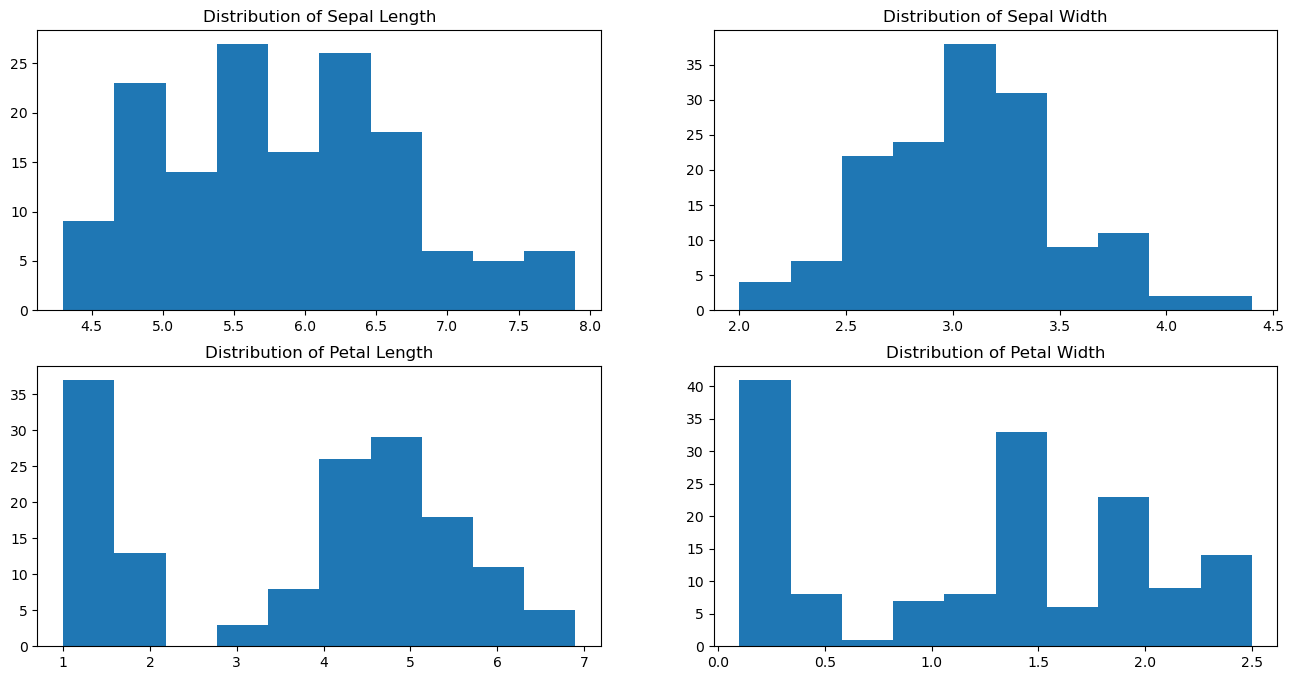

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(data["SepalLengthCm"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(data["SepalWidthCm"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(data["PetalLengthCm"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(data["PetalWidthCm"]);

##### From above histograms,we can observe that: 
                      - sepal width has a normal curve.
                      - sepal length is lightly right skewed.
                      - We can't make any assumptions about the distributions of petal length and petal width just based on the histograms,as it does not have a definitive shape.

#### Analysing correlation between feature and Target

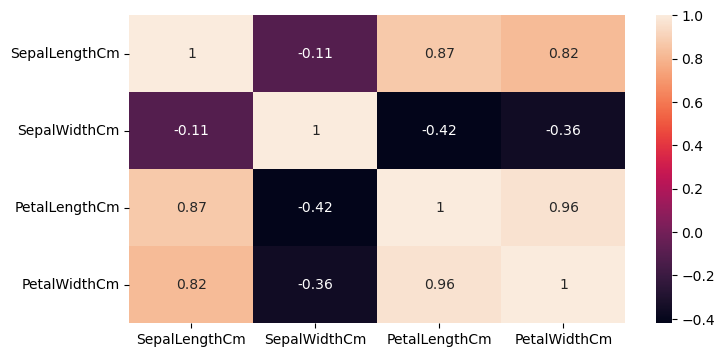

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True);

- From above heatmap, we can observe that:
                          - There is a high correlation between Petal length and petal width.
                          - Sepal length and sepal width are almost independent of each other.
                          - But, sepal length has a high correlation with both the petal length and petal width.

### Splitting The Data into Training And Testing Dataset

In [54]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [58]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

- Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [17]:
# Importing the decision tree classifier for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [60]:
# fitting the model to the train data

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Hurray!!!!!  Decision Tree is created!!")

# predcting target for test data using above model

predictions = dtree.predict(X_test)

# Checking the accuracy of the predictions


print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, y_test))

# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

Hurray!!!!!  Decision Tree is created!!
The accuracy of Decision Tree is: 0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


- Accuracy is a ratio of correct predictions to the total predictions.
                Accuracy= (TN+TP)/N

- The accuracy of the model built is almost 98%. Which means that the model predicts accurate result 98 times out of 100 times.

- From Confusion matrix:
              - It means only 1 observation has been classified as false.

### *Let us first visualize the model prediction results.*

In [30]:
#Let us visualize the Decision Tree to understand it better

# Install required libraries

!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
# Import necessary libraries for graph viz
from six import StringIO    
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

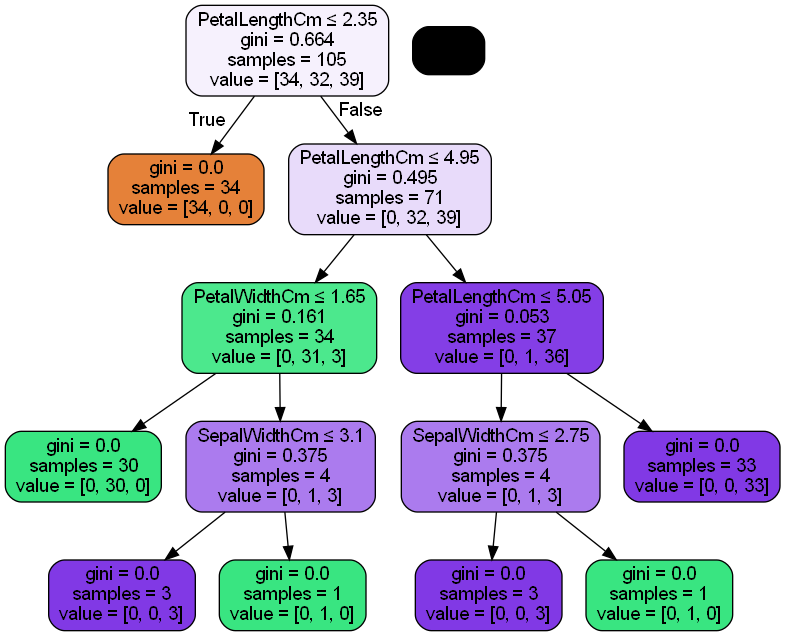

In [56]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred to as the Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

- Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let’s optimize it by pruning.

- In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. The maximum depth of the tree can be used as a control variable for pre-pruning.

In [61]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)#Predict the response for test dataset
y_pred = classifier.predict(X_test)# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


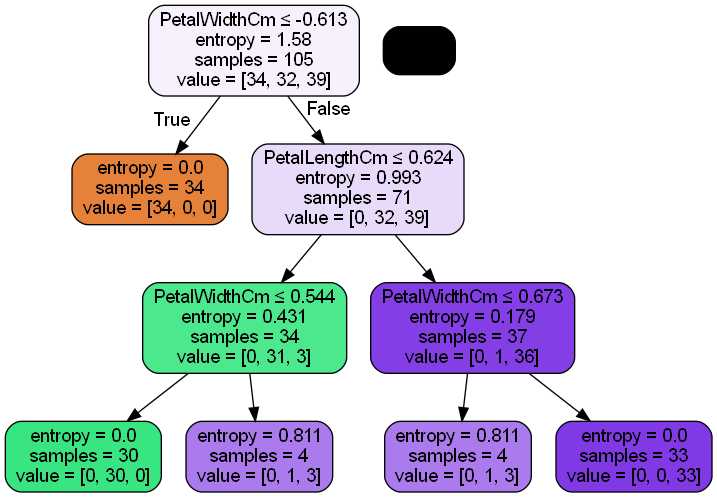

In [63]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.